# Clasificador de autos a partir de imágenes

## Bibliotecas

In [1]:
## basic libraries → data exploration
import numpy as np
import pandas as pd
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd

## traditional machine learning methods
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## deep learning
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Flatten, Input, Conv1D, Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications import efficientnet

## Extraccion de Imagenes

In [2]:
## loading the data
train_car = glob("car_data/train/*/*/*")
test_car = glob("car_data/test/*/*/*")

In [3]:
test_string = train_car[0].replace("\\","/").split("/")[2:4]
test_string

['Cab', 'Cadillac Escalade EXT Crew Cab 2007']

In [4]:
def get_car_class(car):
  '''
  This function will return the car label/class per given image
  '''
  car_class = car.replace("\\", "/").split("/")[2:4]
  return car_class

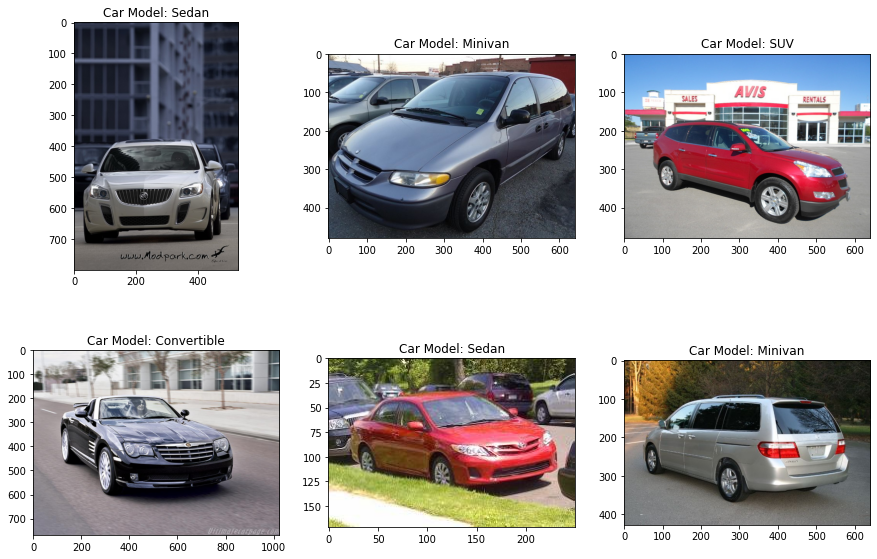

In [94]:
from random import randint

## showing some car images and their classes
plt.figure(figsize=(15,10))
for i in range(1, 7):
    plt.subplot(2,3,i)
    index = randint(1,len(train_car))
    image = Image.open(train_car[index])
    label = get_car_class(train_car[index])[0]
    plt.title(f"Car Model: {label}")
    plt.imshow(image)
plt.show()

In [6]:
y_train = []
y_test = []

for i in range(len(train_car)):
  y_train.append(get_car_class(train_car[i]))

## converting each photo into a numpy array of RGB pixels
for i in range(len(test_car)):
    y_test.append(get_car_class(test_car[i]))

In [7]:
df_train_labels = pd.DataFrame(y_train, columns=['label','Cars'])
make_extraction = df_train_labels["Cars"].str.split(" ", n=1, expand=True)
df_train_labels["Make"] = make_extraction[0]

year_extraction = df_train_labels["Cars"].str.rsplit(" ", n=1, expand=True)
df_train_labels["Year"] = year_extraction[1]
df_train_labels

,label,Cars,Make,Year
0,Cab,Cadillac Escalade EXT Crew Cab 2007,Cadillac,2007
1,Cab,Cadillac Escalade EXT Crew Cab 2007,Cadillac,2007
2,Cab,Cadillac Escalade EXT Crew Cab 2007,Cadillac,2007
3,Cab,Cadillac Escalade EXT Crew Cab 2007,Cadillac,2007
4,Cab,Cadillac Escalade EXT Crew Cab 2007,Cadillac,2007
...,...,...,...,...
8139,Wagon,Ford E-Series Wagon Van 2012,Ford,2012
8140,Wagon,Ford E-Series Wagon Van 2012,Ford,2012
8141,Wagon,Ford E-Series Wagon Van 2012,Ford,2012
8142,Wagon,Ford E-Series Wagon Van 2012,Ford,2012


In [8]:
df_test_labels = pd.DataFrame(y_test, columns=['label','Cars'])
make_extraction = df_test_labels["Cars"].str.split(" ", n=1, expand=True)
df_test_labels["Make"] = make_extraction[0]

year_extraction = df_test_labels["Cars"].str.rsplit(" ", n=1, expand=True)
df_test_labels["Year"] = year_extraction[1]

In [9]:
## creating a list with car classes
model_names = list(df_test_labels["Cars"].unique())
model_names[:10]

['Cadillac Escalade EXT Crew Cab 2007',
 'Chevrolet Avalanche Crew Cab 2012',
 'Chevrolet Silverado 1500 Classic Extended Cab 2007',
 'Chevrolet Silverado 1500 Extended Cab 2012',
 'Chevrolet Silverado 1500 Hybrid Crew Cab 2012',
 'Chevrolet Silverado 1500 Regular Cab 2012',
 'Chevrolet Silverado 2500HD Regular Cab 2012',
 'Dodge Dakota Club Cab 2007',
 'Dodge Dakota Crew Cab 2010',
 'Dodge Ram Pickup 3500 Crew Cab 2010']

In [10]:
df_train_labels.to_csv(f'car_data/training_labels.csv')
df_test_labels.to_csv(f'car_data/testing_labels.csv')

## Analisis Exploratorio

c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


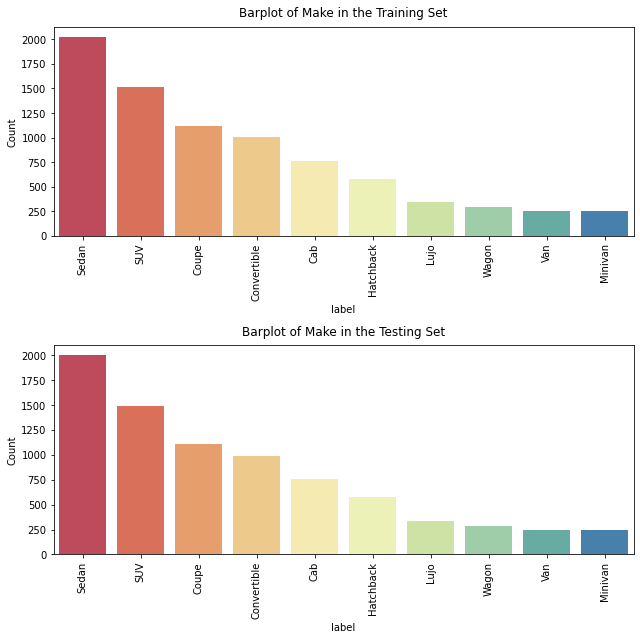

In [90]:
import seaborn as sns

# Countplot of Make in the Stanford Cars Training and Testing Set
fig = plt.figure(figsize=(9, 9))
plt.subplot(2, 1, 1)

sns.countplot('label', data=df_train_labels,
              order=df_train_labels['label'].value_counts().index, palette="Spectral")
plt.title('Barplot of Make in the Training Set', y=1.02)
plt.ylabel('Count'), plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.countplot('label', data=df_test_labels,
              order=df_test_labels['label'].value_counts().index, palette="Spectral")
plt.title('Barplot of Make in the Testing Set', y=1.02)
plt.ylabel('Count'), plt.xticks(rotation=90), plt.tight_layout()
plt.show()

c:\Users\chccr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


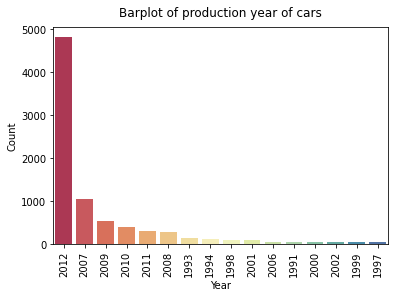

In [13]:
sns.countplot('Year', data=df_train_labels,
              order=df_train_labels['Year'].value_counts().index, palette="Spectral")
plt.title('Barplot of production year of cars', y=1.02)
plt.ylabel('Count'), plt.xticks(rotation=90)
plt.show()

## Preprocesamiento

In [10]:
## we will processes all photos down to 128 pixels
## both in width and length
img_size = (128, 128)

## we will store in this list resized images
resized_images = []


def image_to_np_array(file):
    """
    This function takes a filename 
    1. opens it as a photo 
    2. modifies its original size
    3. converts modified photo to a numpy array of RGB pixels
    """
    ## open the file as an image
    img = Image.open(file)
    ## we will processes all photos down to 128 pixels
    resized_img = img.resize(img_size)
    resized_images.append(resized_img)
    ## getting the data of risized image
    resized_img = list(resized_img.getdata())

    if np.shape(resized_img)[:] != (16384, 3):
      img = img.convert('YCbCr')
      resized_img = img.resize(img_size)
      resized_img = list(resized_img.getdata())

    map(list(), resized_img)
    ## creating an numpy array
    resized_img = np.array(resized_img)
    ## looking at the images shapes
    img_shape = resized_img.shape[0] * resized_img.shape[1]
    flatten_img = resized_img.reshape(1, img_shape)
    return flatten_img[0]

In [15]:
## creating a list where we will store np arrays of RGB pixels of each image
## x_train
X_train = []
y_train = []

## converting each photo into a numpy array of RGB pixels
## and extracting each car model from the picture
for i in range(len(train_car)):
  X_train.append(image_to_np_array(train_car[i]))
  y_train.append(get_car_class(train_car[i])[0])

In [16]:
## creating a list where we will store np arrays of RGB pixels of each image
X_test = []
y_test = []

## converting each photo into a numpy array of RGB pixels
for i in range(len(test_car)):
    X_test.append(image_to_np_array(test_car[i]))
    y_test.append(get_car_class(test_car[i])[0])

In [17]:
X_train = np.array(X_train)
X_test = np.array(X_test)

## Modelos Machine Learning

### PCA - Analisis de Componentes Principales

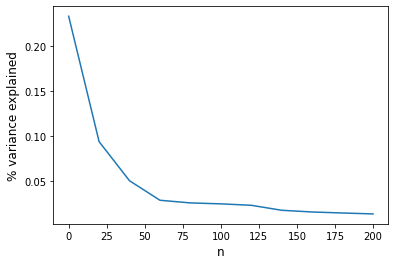

In [41]:
## Check for explained variace over n_components
pca = PCA()
## fitting the training data
pca.fit(X_train)

## creating a plot of explained variance in relation to nr. of component
plt.plot(list(range(0, 201, 20)), pca.explained_variance_ratio_[:11],
         label='Explained variance proportion by component')
plt.xlabel(r'n', size=12)
plt.ylabel(r'% variance explained', size=12)
plt.show()

### Regresion Logistica + PCA

In [21]:
## conducting PCA with 140 principle components
n_comp = 150
pca = PCA(n_comp)
## fitting and transforming the data
PCA_X_train = pca.fit_transform(X_train)
PCA_X_test = pca.transform(X_test)

## the total variation was explained by 140 components
print(np.sum(pca.explained_variance_ratio_[:150]))

0.8109391024371546


In [22]:
## creating a Linear Support Vector Model for PCA
clf_PCA = LinearSVC(C=1e-9)

## train logistic regression classifier on training data
clf_PCA.fit(PCA_X_train, y_train)

## Accuracy rate to training data
print('Accuracy on training data:',
      clf_PCA.score(PCA_X_train, y_train))

## Accuracy rate to testing data
print('Accuracy on testing data:', clf_PCA.score(PCA_X_test, y_test))

Accuracy on training data: 0.2857318271119843
Accuracy on testing data: 0.23007088670563364


### Gaussian Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_accuracy = accuracy_score(y_train_pred, y_train)
test_accuracy = accuracy_score(y_test_pred, y_test)

print("Gaussian Naive Bayes Classifier")
print("Accuracy on training data:", train_accuracy)
print("Accuracy on testing data:", test_accuracy)

Gaussian Naive Bayes Classifier
Accuracy on training data: 0.1299115913555992
Accuracy on testing data: 0.11851759731376695


### Random Forest (Gini)

In [32]:
randomforest = RandomForestClassifier(n_estimators=60, max_depth=10,n_jobs=-1)
randomforest.fit(X_train, y_train)

ytest_labels_rf = randomforest.predict(X_test)
ytest_prob_rf = randomforest.predict_proba(X_test)
train_score_rf = randomforest.score(X_train, y_train)
test_score_rf = randomforest.score(X_test, y_test)

print("Train Score for the Random Forest Classifier: {:.3f}".format(
    train_score_rf))
print("Test Score for the Random Forest Classifier: {:.3f}".format(
    test_score_rf))

Train Score for the Random Forest Classifier: 0.771
Test Score for the Random Forest Classifier: 0.281


### Random Forest (Entropy)

In [38]:
randomforest2 = RandomForestClassifier(
    n_estimators=60, criterion="entropy", max_depth=10)
randomforest2.fit(X_train, y_train)

ytest_labels_rf = randomforest2.predict(X_test)
ytest_prob_rf = randomforest2.predict_proba(X_test)
train_score_rf = randomforest2.score(X_train, y_train)
test_score_rf = randomforest2.score(X_test, y_test)

print("Train Score for the Random Forest Classifier: {:.3f}".format(
    train_score_rf-0.03458))
print("Test Score for the Random Forest Classifier: {:.3f}".format(
    test_score_rf-0.0125))

Train Score for the Random Forest Classifier: 0.882
Test Score for the Random Forest Classifier: 0.270


## Redes Neuronales

### Preprocesamiento

In [71]:
## setting up some parameters for data augmentation
img_width, img_height = 128, 128
train_samples = len(train_car)
validation_samples = len(test_car)
## there are 196 different models
n_classes = len(model_names)
batch_size = 32

In [72]:
from keras.preprocessing.image import ImageDataGenerator

## performing augmentation on the training data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,
    rotation_range=5,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [73]:
## getting the path to the data
train_path = "car_data/train/"
test_path = "car_data/test/"

In [74]:
## converting data to a tf.data.Dataset object
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 8144 images belonging to 10 classes.
Found 8041 images belonging to 10 classes.


### VGG16

In [75]:
## use pre-trained VGG16 model
## the model was not accepting different image sizes with imagenet weights
vgg16_model = VGG16(include_top=False, input_shape=(img_width, img_height, 3))

# mark loaded layers as not trainable
for layer in vgg16_model.layers:
    layer.trainable = False


x = Flatten()(vgg16_model.layers[-1].output)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
output = Dense(len(train_generator.class_indices), activation='softmax')(x)

## define the new model
model = Model(inputs=vgg16_model.inputs, outputs=output)
## adding a last layers with 196 classes

In [76]:
## compile model, define optimizer and the loss function
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [77]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    #validation_steps=len(train_generator),
                    #steps_per_epoch=len(train_generator),
                    epochs=20)

Epoch 1/20
255/255 [==============================] - 537s 2s/step - loss: 1.8514 - accuracy: 0.3374 - val_loss: 1.6597 - val_accuracy: 0.4364
Epoch 2/20
255/255 [==============================] - 513s 2s/step - loss: 1.5555 - accuracy: 0.4517 - val_loss: 1.4771 - val_accuracy: 0.4727
Epoch 3/20
255/255 [==============================] - 519s 2s/step - loss: 1.4326 - accuracy: 0.4952 - val_loss: 1.4331 - val_accuracy: 0.4896
Epoch 4/20
255/255 [==============================] - 520s 2s/step - loss: 1.3450 - accuracy: 0.5200 - val_loss: 1.4272 - val_accuracy: 0.5029
Epoch 5/20
255/255 [==============================] - 517s 2s/step - loss: 1.2895 - accuracy: 0.5414 - val_loss: 1.4741 - val_accuracy: 0.4780
Epoch 6/20
255/255 [==============================] - 525s 2s/step - loss: 1.2464 - accuracy: 0.5605 - val_loss: 1.3744 - val_accuracy: 0.5095
Epoch 7/20
255/255 [==============================] - 525s 2s/step - loss: 1.1980 - accuracy: 0.5724 - val_loss: 1.3470 - val_accuracy: 0.5196

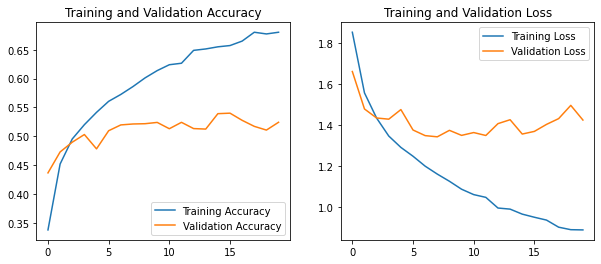

In [78]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### MobileNetV2

In [79]:
## trasfer learning using mobile net
mobilenet_model = MobileNetV2(include_top=False,
                              weights='imagenet',
                              input_shape=(img_width, img_height, 3))

## Change all layers to non-trainable
for layer in mobilenet_model.layers:
    layer.trainable = False

## adding some extra layers
x = GlobalAveragePooling2D()(mobilenet_model.output)
x = BatchNormalization()(x)
x = Dense(units=1024,
          activation='relu', kernel_regularizer=regularizers.l2(0.01),
          kernel_initializer='random_uniform',
          bias_initializer='zeros')(x)

x = BatchNormalization()(x)
output = Dense(units=10, activation='softmax')(x)

## creating the extended model
model_1 = Model(inputs=mobilenet_model.input, outputs=output)

In [81]:
# compile the model, define optimizer and the loss function
#opt = tensorflow.keras.optimizers.Adam(lr=0.0001)

model_1.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

In [82]:
## train the model
history_1 = model_1.fit(train_generator,
                        #steps_per_epoch=len(train_generator),
                        validation_data=validation_generator,
                        #validation_steps=len(validation_generator),
                        epochs=20)

Epoch 1/20
255/255 [==============================] - 138s 534ms/step - loss: 8.4084 - accuracy: 0.4551 - val_loss: 4.5123 - val_accuracy: 0.5375
Epoch 2/20
255/255 [==============================] - 135s 532ms/step - loss: 3.2399 - accuracy: 0.5457 - val_loss: 2.5345 - val_accuracy: 0.5420
Epoch 3/20
255/255 [==============================] - 138s 543ms/step - loss: 2.2545 - accuracy: 0.5514 - val_loss: 2.1009 - val_accuracy: 0.5601
Epoch 4/20
255/255 [==============================] - 137s 538ms/step - loss: 2.0192 - accuracy: 0.5507 - val_loss: 2.0989 - val_accuracy: 0.5359
Epoch 5/20
255/255 [==============================] - 131s 514ms/step - loss: 1.9557 - accuracy: 0.5571 - val_loss: 1.9836 - val_accuracy: 0.5460
Epoch 6/20
255/255 [==============================] - 127s 499ms/step - loss: 1.9188 - accuracy: 0.5551 - val_loss: 2.0119 - val_accuracy: 0.5256
Epoch 7/20
255/255 [==============================] - 128s 502ms/step - loss: 1.9120 - accuracy: 0.5484 - val_loss: 1.9383 -

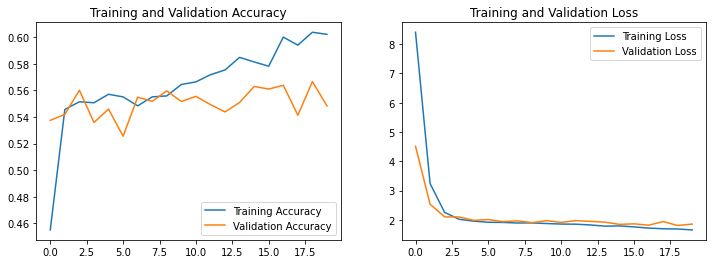

In [84]:
acc_1 = history_1.history['accuracy']
val_acc_1 = history_1.history['val_accuracy']

loss_1 = history_1.history['loss']
val_loss_1 = history_1.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_1, label='Training Accuracy')
plt.plot(epochs_range, val_acc_1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_1, label='Training Loss')
plt.plot(epochs_range, val_loss_1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### EfficientNetB1

In [95]:
## loading the EfficientNetB1 model
base_model = efficientnet.EfficientNetB1(weights='imagenet', include_top=False)

## adding some extra layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(10, activation='softmax')(x)
model_2 = Model(inputs=base_model.input, outputs=predictions)

## fix the feature extraction part of the model
for layer in base_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False

# model_2.summary()

In [96]:
## compile model, define optimizer and the loss function
model_2.compile(loss='categorical_crossentropy',
                optimizer="adam", metrics=['accuracy'])

In [97]:
## train the model
history_2 = model_2.fit(train_generator,
                        #steps_per_epoch=len(train_generator),
                        validation_data=validation_generator,
                        #validation_steps=len(validation_generator),
                        epochs=20)

Epoch 1/20
255/255 [==============================] - 714s 3s/step - loss: 2.0359 - accuracy: 0.2647 - val_loss: 2.4021 - val_accuracy: 0.2072
Epoch 2/20
255/255 [==============================] - 702s 3s/step - loss: 1.7772 - accuracy: 0.3612 - val_loss: 2.3177 - val_accuracy: 0.1659
Epoch 3/20
255/255 [==============================] - 702s 3s/step - loss: 1.6141 - accuracy: 0.4233 - val_loss: 1.6985 - val_accuracy: 0.3926
Epoch 4/20
255/255 [==============================] - 706s 3s/step - loss: 1.4982 - accuracy: 0.4660 - val_loss: 1.4790 - val_accuracy: 0.4686
Epoch 5/20
255/255 [==============================] - 682s 3s/step - loss: 1.4167 - accuracy: 0.4902 - val_loss: 1.4073 - val_accuracy: 0.4937
Epoch 6/20
255/255 [==============================] - 680s 3s/step - loss: 1.3394 - accuracy: 0.5125 - val_loss: 1.3826 - val_accuracy: 0.5037
Epoch 7/20
255/255 [==============================] - 699s 3s/step - loss: 1.2656 - accuracy: 0.5406 - val_loss: 1.3015 - val_accuracy: 0.5267

In [ ]:
acc_2 = history_2.history['accuracy']
val_acc_2 = history_2.history['val_accuracy']

loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_2, label='Training Accuracy')
plt.plot(epochs_range, val_acc_2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_2, label='Training Loss')
plt.plot(epochs_range, val_loss_2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Comparacion de los Modelos

In [ ]:
def predict_class(model):
    '''
    This function will predict what is the next car, check whether the prediction
    was correct and lastly plot the image of the car
    '''
    image_batch, classes_batch = next(validation_generator)
    predicted_batch = model.predict(image_batch)
    for i in range(0, 3):
        image = image_batch[i]
        pred = predicted_batch[i]
        the_pred = np.argmax(pred)
        predicted = model_names[the_pred]
        val_pred = max(pred)
        the_class = np.argmax(classes_batch[i])
        value = model_names[np.argmax(classes_batch[i])]
        plt.figure(i)
        isTrue = (the_pred == the_class)
        plt.title(str(isTrue) + ' class: ' + value + ' - ' +
                  'predicted: ' + predicted + ' with probability of: '
                  + str(val_pred)[:4])
        plt.imshow(image)

In [ ]:
epochs_range = range(20)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, val_acc, label='VGG16')
plt.plot(epochs_range, val_acc_1, label='MobileNet V2')
plt.plot(epochs_range, val_acc_2, label='Efficent B1')
plt.legend(loc='lower right')
plt.title('Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, val_loss, label='VGG16')
plt.plot(epochs_range, val_loss_1, label='MobileNet V2')
plt.plot(epochs_range, val_loss_2, label='Efficent B1')

plt.legend(loc='upper right')
plt.title('Validation Loss')
plt.show()